In [3]:
###demonstration notebook for the article "Computing Danish Bible Translations: A Stylometric Analysis of Bibelen 2020 Compared with DO92"


In [6]:
#Load in the texts

import pandas as pd

from glob import glob

books = []


for book in glob("./data1_nopunct/books/*/*/*.txt"):
    book_type = book.split("/")[-2].strip()
    book_translator = book.split("/")[-3].strip()
    book_name = book.split("/")[-1].split(".")[0].replace(book_translator, "").strip()
    with open(book, "r") as f:
        book_content = f.read().replace("\n", " ").strip()
    books.append({
        "type": book_type,
        "name": book_name,
        "translator": book_translator,
        "content": book_content
    })



In [ ]:
##Length and Vocabulary Analyses

In [7]:
## Total token count for Table 2



book_df = pd.DataFrame(books)

# Dataframe contains the number of tokens per book
book_df = book_df.assign(count_tokens = pd.DataFrame(books).content.apply(lambda x: len(x.split(" "))))

# Sum the total number of tokens per translator
print("===== 1992 total number of tokens =====")
print(book_df[book_df.translator == "1992"].count_tokens.sum())
print("===== 2020 total number of tokens =====")
print(book_df[book_df.translator == "2020"].count_tokens.sum())

# Difference in number of tokens per book
# If the value is positive, the 1992 translation has more tokens than the 2020 translation
# If the value is negative, the 2020 translation has more tokens than the 1992 translation
diff_tokens = pd.DataFrame(book_df[book_df.translator == "1992"].sort_values("name").count_tokens.values - book_df[book_df.translator == "2020"].sort_values("name").count_tokens.values)
diff_tokens = diff_tokens.assign(name = book_df[book_df.translator == "1992"].sort_values("name").name.values)
diff_tokens.columns = ["1992 translation - 2020 translation", "name"]

===== 1992 total number of tokens =====
665987
===== 2020 total number of tokens =====
652060


In [ ]:
## Token counts for Table 3 and NT/OT Token counts in Table 2

book_df["token_count"] = book_df["content"].apply(lambda x: len(x.split()))

In [ ]:
OT1992 = book_df[(book_df["type"]=="GT") & (book_df["translator"]=="1992")]["token_count"].sum()
NT1992 = book_df[(book_df["type"]=="NT") & (book_df["translator"]=="1992")]["token_count"].sum()
OT2020 = book_df[(book_df["type"]=="GT") & (book_df["translator"]=="2020")]["token_count"].sum()
NT2020 = book_df[(book_df["type"]=="NT") & (book_df["translator"]=="2020")]["token_count"].sum()

print("OT1992")
print("NT1992")
print("OT2020")
print("NT2020")
print(OT1992)
print(NT1992)
print(OT2020)
print(NT2020)

token_pivot = book_df.pivot(index="name", columns="translator", values="token_count")
token_pivot["diff_1992_minus_2020"] = token_pivot["1992"] - token_pivot["2020"]
token_pivot["diff_percent_1992_vs_2020"] = 100 * token_pivot["diff_1992_minus_2020"] / token_pivot["2020"]
token_pivot_sorted = token_pivot.sort_values(by="diff_1992_minus_2020", ascending=False)
print(token_pivot_sorted)
token_pivot_sorted.to_csv("token_counts_sorted.csv")




OT1992
NT1992
OT2020
NT2020
493479
169998
463743
188232
translator   1992   2020  diff_1992_minus_2020  diff_percent_1992_vs_2020
name                                                                     
26_Ezek     30664  24956                  5708                  22.872255
03_Lev      19765  15124                  4641                  30.686326
04_Num      22849  18252                  4597                  25.186281
02_Exod     26617  22641                  3976                  17.561062
05_Deut     26694  23245                  3449                  14.837599
...           ...    ...                   ...                        ...
18_Job      15717  17647                 -1930                 -10.936703
45_Rom       8941  10893                 -1952                 -17.919765
42_Luke     23962  25941                 -1979                  -7.628850
44_Acts     22513  24886                 -2373                  -9.535482
23_Isa      29399  32268                 -2869          

In [ ]:
## Vocabulary Richness


In [ ]:
# Perform the lemmatization using Danish Spacy model
# First, you need to install the large model of Danish Spacy, running
# python -m spacy download da_core_news_lg
# in the terminal
#restart the notebook after installing the model
# Run the notebook from the cell below to continue

In [3]:
import spacy
import pandas as pd
from glob import glob

books = []


for book in glob("./data1_nopunct/books/*/*/*.txt"):
    book_type = book.split("/")[-2].strip()
    book_translator = book.split("/")[-3].strip()
    book_name = book.split("/")[-1].split(".")[0].replace(book_translator, "").strip()
    with open(book, "r") as f:
        book_content = f.read().replace("\n", " ").strip()
    books.append({
        "type": book_type,
        "name": book_name,
        "translator": book_translator,
        "content": book_content
    })

book_df = pd.DataFrame(books)



nlp = spacy.load("da_core_news_lg")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

book_df["lemmatized_content"] = book_df["content"].apply(lemmatize_text)

In [ ]:
## Unique number of lemmas per book

In [4]:
book_df = book_df.assign(count_lemmas = book_df.lemmatized_content.apply(lambda x: len(set(x.split(" ")))))
print(book_df[["name", "translator", "count_lemmas"]])

         name translator  count_lemmas
0     21_Eccl       1992           820
1     26_Ezek       1992          2474
2     12_2Kgs       1992          1982
3      04_Num       1992          2085
4      39_Mal       1992           419
..        ...        ...           ...
127  63_2John       2020           135
128   41_Mark       2020          1509
129   55_2Tim       2020           506
130  62_1John       2020           344
131   57_Phlm       2020           186

[132 rows x 3 columns]


In [5]:
## Calculation for Table 5
# Unique number of lemmas across all the books
print("===== 1992 total number of lemmas =====")
print(len(set(" ".join(book_df[book_df.translator == "1992"].lemmatized_content).split(" "))))

print("===== 2020 total number of lemmas =====")
print(len(set(" ".join(book_df[book_df.translator == "2020"].lemmatized_content).split(" "))))

print("===")
print("Difference in unique lemmas between 1992 and 2020 over all the bible")
print(len(set(" ".join(book_df[book_df.translator == "1992"].lemmatized_content).split(" "))) - len(set(" ".join(book_df[book_df.translator == "2020"].lemmatized_content).split(" "))))

===== 1992 total number of lemmas =====
16194
===== 2020 total number of lemmas =====
14329
===
Difference in unique lemmas between 1992 and 2020 over all the bible
1865


In [ ]:
#word types OT1992, NT1992, OT2020, NT2020
def all_unique_lemmas(series):
    # Collects all lemmas across the books
    lemma_set = set()
    for text in series:
        for lemma in text.split():
            lemma_set.add(lemma.lower())
    return len(lemma_set)

groups = {
    "GT1992":  book_df.query('type == "GT" and translator == "1992"')["lemmatized_content"],
    "NT1992":  book_df.query('type == "NT" and translator == "1992"')["lemmatized_content"],
    "GT2020":  book_df.query('type == "GT" and translator == "2020"')["lemmatized_content"],
    "NT2020":  book_df.query('type == "NT" and translator == "2020"')["lemmatized_content"],
}

for k, s in groups.items():
    print(f"{k}: {all_unique_lemmas(s)}")

GT1992: 13668
NT1992: 6274
GT2020: 12507
NT2020: 5503


In [9]:
#calculations for Table 6 and Table 7



OT1992 = book_df[(book_df["type"]=="GT") & (book_df["translator"]=="1992")]["count_lemmas"].sum()
NT1992 = book_df[(book_df["type"]=="NT") & (book_df["translator"]=="1992")]["count_lemmas"].sum()
OT2020 = book_df[(book_df["type"]=="GT") & (book_df["translator"]=="2020")]["count_lemmas"].sum()
NT2020 = book_df[(book_df["type"]=="NT") & (book_df["translator"]=="2020")]["count_lemmas"].sum()

print("OT1992")
print("NT1992")
print("OT2020")
print("NT2020")
print(OT1992)
print(NT1992)
print(OT2020)
print(NT2020)

token_pivot = book_df.pivot(index="name", columns="translator", values="count_lemmas")
token_pivot["diff_1992_minus_2020"] = token_pivot["1992"] - token_pivot["2020"]
token_pivot["diff_percent_1992_vs_2020"] = 100 * token_pivot["diff_1992_minus_2020"] / token_pivot["2020"]
token_pivot_sorted = token_pivot.sort_values(by="diff_1992_minus_2020", ascending=False)
# Rund procentkolonnen til 2 decimaler
token_pivot["diff_percent_1992_vs_2020"] = token_pivot["diff_percent_1992_vs_2020"].round(2)
print(token_pivot_sorted)
token_pivot_sorted.to_csv("lemma_counts_sorted.csv")



OT1992
NT1992
OT2020
NT2020
55813
22389
53296
21952
translator  1992  2020  diff_1992_minus_2020  diff_percent_1992_vs_2020
name                                                                   
05_Deut     2310  1985                   325                  16.372796
18_Job      2156  1897                   259                  13.653137
10_2Sam     1947  1743                   204                  11.703959
44_Acts     2260  2068                   192                   9.284333
11_1Kgs     2090  1900                   190                  10.000000
...          ...   ...                   ...                        ...
32_Jonah     310   361                   -51                 -14.127424
07_Judg     1760  1833                   -73                  -3.982542
66_Rev      1221  1310                   -89                  -6.793893
28_Hos       904   996                   -92                  -9.236948
17_Esth      758   855                   -97                 -11.345029

[66 rows x 

In [10]:
token_pivot_sorted_perc = token_pivot.sort_values(by="diff_percent_1992_vs_2020", ascending=False)
print(token_pivot_sorted_perc)
token_pivot_sorted_perc.to_csv("lemma_counts_sorted_perc.csv")

translator  1992  2020  diff_1992_minus_2020  diff_percent_1992_vs_2020
name                                                                   
05_Deut     2310  1985                   325                      16.37
16_Neh      1546  1360                   186                      13.68
18_Job      2156  1897                   259                      13.65
10_2Sam     1947  1743                   204                      11.70
58_Heb      1185  1072                   113                      10.54
...          ...   ...                   ...                        ...
28_Hos       904   996                   -92                      -9.24
57_Phlm      168   186                   -18                      -9.68
62_1John     305   344                   -39                     -11.34
17_Esth      758   855                   -97                     -11.35
32_Jonah     310   361                   -51                     -14.13

[66 rows x 4 columns]


In [ ]:
## Type-Token Ratio (TTR) calculations for Figure 1

In [11]:
book_df = book_df.assign(ttr = book_df.lemmatized_content.apply(lambda x: len(set(x.split(" "))))/book_df.lemmatized_content.apply(lambda x: len(x.split(" "))))

In [12]:
# Compute the difference in TTR
diff_ttr = pd.DataFrame(book_df[book_df.translator == "1992"].sort_values("name").ttr.values - book_df[book_df.translator == "2020"].sort_values("name").ttr.values)
diff_ttr = diff_ttr.assign(name = book_df[book_df.translator == "1992"].sort_values("name").name.values)
diff_ttr.columns = ["1992 translation - 2020 translation variation in TTR", "name"]
diff_ttr = diff_ttr.assign(book_type = book_df[book_df.translator == "1992"].sort_values("name").type.values)
diff_ttr

,1992 translation - 2020 translation variation in TTR,name,book_type
0,0.002162,01_Gen,GT
1,-0.007843,02_Exod,GT
2,-0.016055,03_Lev,GT
3,-0.023071,04_Num,GT
4,0.000575,05_Deut,GT
...,...,...,...
61,-0.005230,62_1John,NT
62,-0.004071,63_2John,NT
63,0.051896,64_3John,NT
64,0.052374,65_Jude,NT


In [13]:
diff_ttr.sort_values(by="1992 translation - 2020 translation variation in TTR", ascending=False).to_csv("diff_ttr_sorted.csv", index=True)

In [14]:
diff_ttr.sort_values(by="1992 translation - 2020 translation variation in TTR", ascending=False).to_csv("diff_ttr_sorted.csv", index=True)

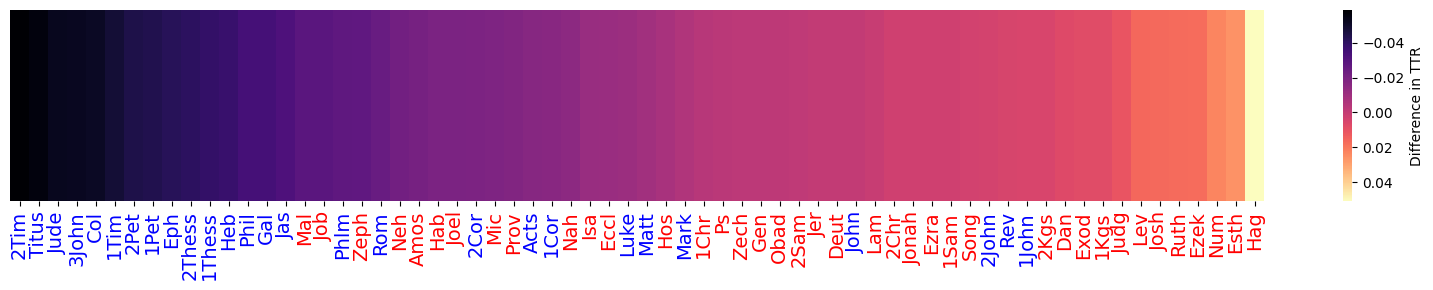

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
import re

plt.figure(figsize=(16, 3))

# Sortér og lav kopi
sorted_df_distances = diff_ttr.sort_values("1992 translation - 2020 translation variation in TTR", ascending=False).copy()

# Fjern tal + underscore præfix i navnene
sorted_df_distances["name_clean"] = sorted_df_distances["name"].apply(lambda s: re.sub(r"^\d+_", "", s))

# Vend fortegnene på værdierne
sorted_df_distances["flipped_ttr"] = -sorted_df_distances["1992 translation - 2020 translation variation in TTR"]

ax = sns.heatmap(
    sorted_df_distances["flipped_ttr"].values.reshape(1, -1),
    cmap="magma",
    xticklabels=sorted_df_distances.name_clean,
    yticklabels=False,
    cbar=True,
    cbar_kws={"label": "Difference in TTR"}
)

# Invertér colorbaren, så -0.04 er øverst og 0.04 nederst
ax.collections[0].colorbar.ax.invert_yaxis()  # [1][6][7]

# Forstør x-tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)

for tick_label, book_type in zip(ax.axes.get_xticklabels(), sorted_df_distances.book_type):
    if book_type == "NT":
        tick_label.set_color("blue")
    else:
        tick_label.set_color("red")

plt.tight_layout()
plt.show()

In [ ]:
## Compute excluded and newly added words
#restart notebook kernel and run from here

In [1]:


from glob import glob

books = []

for book in glob("./data1_nopunct/books/*/*/*.txt"):
    book_type = book.split("/")[-2].strip()
    book_edition = book.split("/")[-3].strip()
    book_name = book.split("/")[-1].split(".")[0].replace(book_edition, "").strip()
    with open(book, "r") as f:
        book_content = f.read().replace("\n", " ").strip()
    books.append({
        "type": book_type,
        "name": book_name,
        "edition": book_edition,
        "content": book_content
    })



In [2]:
import pandas as pd
import spacy

books_df = pd.DataFrame(books)

In [4]:
nlp = spacy.load("da_core_news_lg")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

books_df["lemmatized_content"] = books_df["content"].apply(lemmatize_text)

# Dump the lemmatized content to a csv 
books_df.to_csv("lemmatized_dataset_book.csv", index=False)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Ingen stopord for denne analyse
cv = CountVectorizer(stop_words=None)

# Saml tekst for hver udgave
bible_1992 = " ".join(books_df[books_df["edition"] == "1992"]["lemmatized_content"].values.tolist())
bible_2020 = " ".join(books_df[books_df["edition"] == "2020"]["lemmatized_content"].values.tolist())

# Beregn term frequency for hver udgave
term_frequency_1992 = cv.fit_transform([bible_1992])
term_frequency_df_1992 = pd.DataFrame(term_frequency_1992.todense(), columns=cv.get_feature_names_out())

term_frequency_2020 = cv.fit_transform([bible_2020])
term_frequency_df_2020 = pd.DataFrame(term_frequency_2020.todense(), columns=cv.get_feature_names_out())

# Find alle ord i 1992, som ikke findes i 2020
most_frequent_excluded_1992 = []

for ix, freq in term_frequency_df_1992.T.sort_values(by=0, ascending=False).iterrows():
    if ix not in term_frequency_df_2020.columns:
        most_frequent_excluded_1992.append((ix, freq[0]))

# Konverter til DataFrame for nemmere håndtering og evt. eksport
excluded_words_df = pd.DataFrame(most_frequent_excluded_1992, columns=["word", "frequency"])

#print(f"Antal ord i 1992, som ikke findes i 2020: {len(excluded_words_df)}")
print(excluded_words_df.head(20))  # Vis de 20 hyppigste som eksempel

excluded_words_df = excluded_words_df.sort_values(by="frequency", ascending=False)

# Gem til CSV
excluded_words_df.to_csv("excluded_words_1992_full_list.csv", index=False)

#NB - due to some inaccuracies in the lemmatization we have manually checked the list which makes a different ranking: See the Appendices PDF-file

               word  frequency
0              synd        335
1             synde        323
2        hærskarers        244
3            salomo        242
4               ark        224
5              jesu        175
6            kristi        152
7   åbenbaringstelt        150
8        brændoffer        137
9             sekel        125
10          hellige        125
11       fædrenehus        118
12           trælle        116
13          således        111
14          arvelod        108
15           legeme         98
16          absalom         96
17     afgrødeoffer         93
18             færd         93
19            fyrre         92


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Ingen stopord for denne analyse
cv = CountVectorizer(stop_words=None)

# Saml tekst for hver udgave
bible_1992 = " ".join(books_df[books_df["edition"] == "1992"]["lemmatized_content"].values.tolist())
bible_2020 = " ".join(books_df[books_df["edition"] == "2020"]["lemmatized_content"].values.tolist())

# Beregn term frequency for hver udgave
term_frequency_1992 = cv.fit_transform([bible_1992])
term_frequency_df_1992 = pd.DataFrame(term_frequency_1992.todense(), columns=cv.get_feature_names_out())

term_frequency_2020 = cv.fit_transform([bible_2020])
term_frequency_df_2020 = pd.DataFrame(term_frequency_2020.todense(), columns=cv.get_feature_names_out())

# Find alle ord i 2020, som ikke findes i 1992
most_frequent_new_2020 = []

for ix, freq in term_frequency_df_2020.T.sort_values(by=0, ascending=False).iterrows():
    if ix not in term_frequency_df_1992.columns:
        most_frequent_new_2020.append((ix, freq[0]))

# Konverter til DataFrame og sorter efter hyppighed
new_words_df = pd.DataFrame(most_frequent_new_2020, columns=["word", "frequency"])
new_words_df = new_words_df.sort_values(by="frequency", ascending=False)

#print(f"Antal ord i 2020, som ikke findes i 1992: {len(new_words_df)}")
print(new_words_df.head(20))  # Vis de 20 hyppigste som eksempel

# Gem til CSV
new_words_df.to_csv("new_words_2020_full_list.csv", index=False)

                 word  frequency
0              afsted        409
1              selvom        384
2             salomon        311
3             nordrig        237
4               meter        169
5              sydrig        148
6             absalon        110
7          respektere        102
8          judastamme         95
9              præcis         92
10           sydriget         70
11            mirakle         69
12            stamfar         65
13         nogensinde         65
14                sex         62
15              snyde         56
16              liter         54
17           invitere         54
18            fejlfri         50
19  nordisraelitterne         48


In [ ]:
## Quantifying the Distance Between the Translations 

In [ ]:
#Countvectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

cv = CountVectorizer(stop_words=open("List of stop words used in the analyses (Fetched from Bertel Torp)").read().split("\n"))
pca = PCA(n_components=2)

tf = cv.fit_transform(books_df["lemmatized_content"])
term_frequency_df = pd.DataFrame(tf.todense(), columns=cv.get_feature_names_out())
term_frequency_df["type"] = books_df["type"]
term_frequency_df["name"] = books_df["name"]
term_frequency_df["edition"] = books_df["edition"]


projected_tf = pca.fit_transform(tf.toarray())
projected_tf_df = pd.DataFrame(projected_tf, columns=["x", "y"])
projected_tf_df["type"] = books_df["type"]
projected_tf_df["name"] = books_df["name"]
projected_tf_df["edition"] = books_df["edition"]

/Users/au256145/bibelen2020_appendices/bib2020venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


In [17]:
from sklearn.metrics import pairwise_distances
import numpy as np


translation_1992 = projected_tf_df[projected_tf_df["edition"] == "1992"].drop(columns=["type", "name", "edition"])
translation_2020 = projected_tf_df[projected_tf_df["edition"] == "2020"].drop(columns=["type", "name", "edition"])

print("Average distance between all books in 1992 translation:", pairwise_distances(translation_1992).mean())
print("Average distance between all books in 1992 translation (OT):", pairwise_distances(projected_tf_df[(projected_tf_df["edition"] == "1992") & (projected_tf_df["type"] == "GT")].drop(columns=["type", "name", "edition"])).mean())
print("Average distance between all books in 1992 translation (NT):", pairwise_distances(projected_tf_df[(projected_tf_df["edition"] == "1992") & (projected_tf_df["type"] == "NT")].drop(columns=["type", "name", "edition"])).mean())
print("==")
print("Median distance between all books in 1992 translation:", np.median(pairwise_distances(translation_1992)))
print("Median distance between all books in 1992 translation (OT):", np.median(pairwise_distances(projected_tf_df[(projected_tf_df["edition"] == "1992") & (projected_tf_df["type"] == "GT")].drop(columns=["type", "name", "edition"]))))
print("Median distance between all books in 1992 translation (NT):", np.median(pairwise_distances(projected_tf_df[(projected_tf_df["edition"] == "1992") & (projected_tf_df["type"] == "NT")].drop(columns=["type", "name", "edition"]))))

print("======")
print("Average distance between all books in 2020 translation:", pairwise_distances(translation_2020).mean())
print("Average distance between all books in 2020 translation (OT):", pairwise_distances(projected_tf_df[(projected_tf_df["edition"] == "2020") & (projected_tf_df["type"] == "GT")].drop(columns=["type", "name", "edition"])).mean())
print("Average distance between all books in 2020 translation (NT):", pairwise_distances(projected_tf_df[(projected_tf_df["edition"] == "2020") & (projected_tf_df["type"] == "NT")].drop(columns=["type", "name", "edition"])).mean())
print("==")
print("Median distance between all books in 2020 translation:", np.median(pairwise_distances(translation_2020)))
print("Median distance between all books in 2020 translation (OT):", np.median(pairwise_distances(projected_tf_df[(projected_tf_df["edition"] == "2020") & (projected_tf_df["type"] == "GT")].drop(columns=["type", "name", "edition"]))))
print("Median distance between all books in 2020 translation (NT):", np.median(pairwise_distances(projected_tf_df[(projected_tf_df["edition"] == "2020") & (projected_tf_df["type"] == "NT")].drop(columns=["type", "name", "edition"]))))


Average distance between all books in 1992 translation: 239.01106464765505
Average distance between all books in 1992 translation (OT): 291.0487047461987
Average distance between all books in 1992 translation (NT): 83.5578936062566
==
Median distance between all books in 1992 translation: 155.4155877240606
Median distance between all books in 1992 translation (OT): 274.2586684365332
Median distance between all books in 1992 translation (NT): 60.30797990630653
Average distance between all books in 2020 translation: 201.81462342668144
Average distance between all books in 2020 translation (OT): 241.96528101571957
Average distance between all books in 2020 translation (NT): 116.19406232172035
==
Median distance between all books in 2020 translation: 147.86781352116049
Median distance between all books in 2020 translation (OT): 195.890306514471
Median distance between all books in 2020 translation (NT): 84.17983968658454


In [19]:


# Compute distances
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances

distances = []
for book in pd.unique(term_frequency_df.name):
    book_type = term_frequency_df[term_frequency_df["name"] == book]["type"].iloc[0]
    tf_1992 = term_frequency_df[(term_frequency_df["name"] == book) & (term_frequency_df["edition"] == "1992")]
    tf_2020 = term_frequency_df[(term_frequency_df["name"] == book) & (term_frequency_df["edition"] == "2020")]
    distances.append({
        "book_type": book_type,
        "book_name": book,
        "manhattan_distance": manhattan_distances(tf_1992.drop(columns=["type", "name", "edition"]).values, tf_2020.drop(columns=["type", "name", "edition"]).values)[0][0],
        "cosine_similarity": cosine_similarity(tf_1992.drop(columns=["type", "name", "edition"]).values, tf_2020.drop(columns=["type", "name", "edition"]).values)[0][0]})



In [21]:
df_distances = pd.DataFrame(distances)



In [ ]:
#Figure 2 Calculations

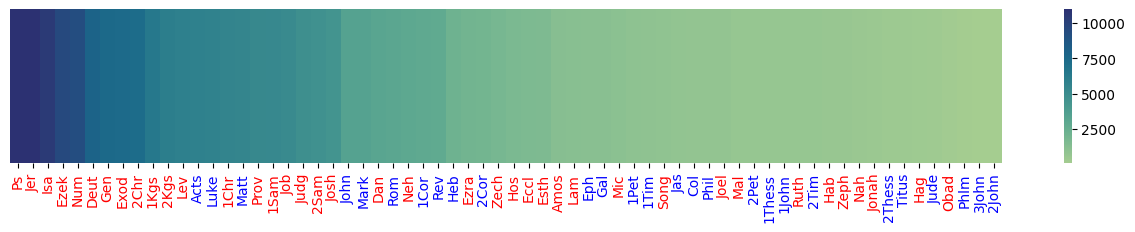

In [22]:
plt.figure(figsize=(16, 2))

# Sorter dataframen baseret på manhattan_distance
sorted_df_distances = df_distances.sort_values("manhattan_distance", ascending=False)

# Fjern præfikser med tal og underscore fra book_name
sorted_df_distances['book_name'] = sorted_df_distances['book_name'].str.replace(r'^\d+_', '', regex=True)

# Opret heatmap
ax = sns.heatmap(
    sorted_df_distances.manhattan_distance.values.reshape(1, -1),
    cmap="crest",
    xticklabels=sorted_df_distances.book_name,
    yticklabels=False,
    cbar=True
)

# Farv xticklabels baseret på book_type
for tick_label, book_type in zip(ax.axes.get_xticklabels(), sorted_df_distances.book_type):
    if book_type == "NT":
        tick_label.set_color("blue")
    else:
        tick_label.set_color("red")

In [ ]:
#Frequency Based Vectorizer

#restart the 

In [ ]:


# Vær opmærksom på, hvilken slags vectorizer der bruges
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Brug TfidfVectorizer med idf deaktiveret
tfidf_freq = TfidfVectorizer(stop_words=open("../data/stopord_351_berteltorptxt.txt").read().split("\n"), use_idf=False)
pca_freq = PCA(n_components=2)

# Transformer teksten
tf_freq = tfidf_freq.fit_transform(books_df["lemmatized_content"])

# Opret en dataframe for term-frekvensen
term_frequency_freq_df = pd.DataFrame(tf_freq.todense(), columns=tfidf_freq.get_feature_names_out())
term_frequency_freq_df["type_freq"] = books_df["type"]
term_frequency_freq_df["name_freq"] = books_df["name"]
term_frequency_freq_df["edition_freq"] = books_df["edition"]

# Projekter dataen til to dimensioner med PCA
projected_tf_freq = pca_freq.fit_transform(tf_freq.toarray())
projected_tf_freq_df = pd.DataFrame(projected_tf_freq, columns=["x_freq", "y_freq"])
projected_tf_freq_df["type_freq"] = books_df["type"]
projected_tf_freq_df["name_freq"] = books_df["name"]
projected_tf_freq_df["edition_freq"] = books_df["edition"]

